# Coursera Capstone Project Week 2

## 1. Presentation
Nous utiliserons les donnees provenant d'un dataset contenant les informations sur les AirBnB de la ville de Paris. Notre objectif etant en utilsant les donnees de qualite sur la ville de Paris de fournir a une personne qui recherche un AirBnB une alternative fiable en fonction de ses preferences.

## 2. Data exploration 

In [1]:
#import important libraries and tools
#Data processing lib 
import numpy as np
import pandas as pd

#data visualisation lib 
import matplotlib.pyplot as plt 
import seaborn as sns

#data science lib 
import sklearn as sk

### 2.1 Explication des colones

**host_response_rate**: pourcentage de reponses des utilisateurs <br/>
**host_acceptance_rate**: <br/>
**host_listings_count**: <br/>
**latitude**: position en latitude du bien <br/>
**longitude**: position en longitue du bien <br/>
**city**: le dataset etant liee a paris, toutes les villes qui y seront represente seront identique <br/>
**zipcode**: <br/>
**state**: Pareil que pour la date, ils s'agirat ici juste de IDF ou ile-de-france <br/>
**accommodates**: Le nombre de personne qui peuvent occuper l'appartement a un moment <br/>
**room_type**: Le type de logement, il nous faudrat faire une exploration pour trouver quels sont les types et leur impact sur le prix <br/> 
**bedrooms**: Nombre de chambre <br/>
**bathrooms**: Nombre de salle d'eau <br/>
**beds**: Nombre de lit <br/>
**price**: Le prix de l'appartement <br/>
**cleaning_fee**: Frais de netoyage <br/>
**security_deposit**: depot de garanti<br/>
**minimum_nights**: nombre de nuit minimum<br/>
**maximum_nights**: nombre de nuit maximum<br/>
**number_of_reviews**: nombre de revue<br/>

In [2]:
df  = pd.read_csv("paris_airbnb.csv")

In [3]:
print(df.shape)
df.head()

(8000, 19)


host_response_rate  host_acceptance_rate  host_listings_count  latitude  \
0               100%                   NaN                  1.0  48.83349   
1               100%                   NaN                  1.0  48.85100   
2               100%                   NaN                  2.0  48.85758   
3               100%                   NaN                  1.0  48.86528   
4                67%                   NaN                  3.0  48.85899   

   longitude   city zipcode          state  accommodates        room_type  \
0    2.31852  Paris   75014  Île-de-France             2  Entire home/apt   
1    2.35869  Paris   75004  Ile-de-France             2  Entire home/apt   
2    2.35275  Paris   75004  Île-de-France             4  Entire home/apt   
3    2.39326  Paris   75020  Ile-de-France             3  Entire home/apt   
4    2.34735  Paris   75001  Île-de-France             2  Entire home/apt   

   bedrooms  bathrooms  beds    price cleaning_fee security_deposit  \
0       0.0        1.0   0.0   $75.00       $50.00            $0.00   
1       0.0        1.0   1.0  $115.00       $36.00            $0.00   
2       2.0        1.0   2.0  $115.00       $50.00          $200.00   
3       1.0        1.0   1.0   $90.00          NaN              NaN   
4       1.0        1.0   1.0   $75.00      $200.00        $1,500.00   

   minimum_nights  maximum_nights  number_of_reviews  
0               3              15                  8  
1               1              90                173  
2              10              23                243  
3               3             365                  1  
4             180             365                  0

### 2.2 Daframe exploration
Ici nous allons explorer plus en detail le dataset. Pour ce faire nous allons sicessivement:<br/>
Compter le nombre de valeur non definie, nan <br/>
Exploration du type de chaque colone qui nous dira comment en faire la conversion dans un type plus ulisable si celui ci ne nous convient pas <br/>
Une supression des doublons et une annalyse des colone que nous considerons comme utiles

In [4]:
# Compter le nombre de valeur nan
df.isna().sum()

host_response_rate      3000
host_acceptance_rate    8000
host_listings_count        1
latitude                   0
longitude                  0
city                       3
zipcode                   70
state                     23
accommodates               0
room_type                  0
bedrooms                  24
bathrooms                 58
beds                      14
price                      0
cleaning_fee            1750
security_deposit        1680
minimum_nights             0
maximum_nights             0
number_of_reviews          0
dtype: int64

In [5]:
# Type de donnee
df.dtypes

host_response_rate       object
host_acceptance_rate    float64
host_listings_count     float64
latitude                float64
longitude               float64
city                     object
zipcode                  object
state                    object
accommodates              int64
room_type                object
bedrooms                float64
bathrooms               float64
beds                    float64
price                    object
cleaning_fee             object
security_deposit         object
minimum_nights            int64
maximum_nights            int64
number_of_reviews         int64
dtype: object

In [6]:
# Description des valeurs numerique du dastaset
df.describe()

host_acceptance_rate  host_listings_count     latitude    longitude  \
count                   0.0          7999.000000  8000.000000  8000.000000   
mean                    NaN             7.025878    48.864560     2.348739   
std                     NaN            51.031588     0.017641     0.031611   
min                     NaN             0.000000    48.816560     2.230810   
25%                     NaN             1.000000    48.852230     2.331645   
50%                     NaN             1.000000    48.865400     2.351130   
75%                     NaN             2.000000    48.878740     2.372158   
max                     NaN           836.000000    48.901010     2.439460   

       accommodates     bedrooms    bathrooms         beds  minimum_nights  \
count   8000.000000  7976.000000  7942.000000  7986.000000     8000.000000   
mean       3.198750     1.248370     1.128494     1.753068        8.759375   
std        1.569811     0.838492     0.439104     1.172800       36.234546   
min        1.000000     0.000000     0.000000     0.000000        1.000000   
25%        2.000000     1.000000     1.000000     1.000000        2.000000   
50%        3.000000     1.000000     1.000000     1.000000        3.000000   
75%        4.000000     2.000000     1.000000     2.000000        5.000000   
max       16.000000     7.000000     7.000000    11.000000     1124.000000   

       maximum_nights  number_of_reviews  
count     8000.000000        8000.000000  
mean       546.876000          44.874875  
std        542.848736          69.075322  
min          1.000000           0.000000  
25%         30.000000           4.000000  
50%        365.000000          19.000000  
75%       1125.000000          54.000000  
max      10000.000000         783.000000

In [7]:
# Supression des doublons
df.drop_duplicates(keep = 'first', inplace=True)
df.shape

(8000, 19)

In [8]:
df.describe()

host_acceptance_rate  host_listings_count     latitude    longitude  \
count                   0.0          7999.000000  8000.000000  8000.000000   
mean                    NaN             7.025878    48.864560     2.348739   
std                     NaN            51.031588     0.017641     0.031611   
min                     NaN             0.000000    48.816560     2.230810   
25%                     NaN             1.000000    48.852230     2.331645   
50%                     NaN             1.000000    48.865400     2.351130   
75%                     NaN             2.000000    48.878740     2.372158   
max                     NaN           836.000000    48.901010     2.439460   

       accommodates     bedrooms    bathrooms         beds  minimum_nights  \
count   8000.000000  7976.000000  7942.000000  7986.000000     8000.000000   
mean       3.198750     1.248370     1.128494     1.753068        8.759375   
std        1.569811     0.838492     0.439104     1.172800       36.234546   
min        1.000000     0.000000     0.000000     0.000000        1.000000   
25%        2.000000     1.000000     1.000000     1.000000        2.000000   
50%        3.000000     1.000000     1.000000     1.000000        3.000000   
75%        4.000000     2.000000     1.000000     2.000000        5.000000   
max       16.000000     7.000000     7.000000    11.000000     1124.000000   

       maximum_nights  number_of_reviews  
count     8000.000000        8000.000000  
mean       546.876000          44.874875  
std        542.848736          69.075322  
min          1.000000           0.000000  
25%         30.000000           4.000000  
50%        365.000000          19.000000  
75%       1125.000000          54.000000  
max      10000.000000         783.000000

In [9]:
df.dtypes

host_response_rate       object
host_acceptance_rate    float64
host_listings_count     float64
latitude                float64
longitude               float64
city                     object
zipcode                  object
state                    object
accommodates              int64
room_type                object
bedrooms                float64
bathrooms               float64
beds                    float64
price                    object
cleaning_fee             object
security_deposit         object
minimum_nights            int64
maximum_nights            int64
number_of_reviews         int64
dtype: object

In [10]:
# Liste des villes
df.city.unique()

array(['Paris', 'Paris, 4th arrondissement', 'Saint-Mandé', 'Paris ',
       'Paris-13E-Arrondissement', 'Levallois-Perret', ' Deuil-la-Barre ',
       'Paris-2E-Arrondissement', 'Paris 4e arrondissement', nan,
       'Vincennes', 'Boulogne-Billancourt', 'Paris 13e Arrondissement',
       'Bagnolet', 'Pantin', 'paris', 'PARIS', 'Paris-19E-Arrondissement',
       'Paris 01', 'Paris 11e arrondissement', 'Le Kremlin-Bicêtre',
       'Paris 8è', 'NEUILLY SUR SEINE', 'Le Pré-Saint-Gervais',
       'PARIS 3eme', 'Issy-les-Moulineaux', 'Deuil-la-Barre',
       'Deuil-la-Barre ', 'vanves', 'Issy les moulineaux', 'París',
       'PARIS 02', 'Parigi', 'Paris-10E-Arrondissement', 'Paris 16',
       'Paris 6e arrondissement', 'Paris 10', 'Paris 18e',
       'Neuilly Sur Seine ', 'Montrouge', 'PARIS 05', 'Neuilly-sur-Seine',
       'Paris-16E-Arrondissement',
       'Charenton Le Pont - limitrophe avec paris ',
       'Paris-20E-Arrondissement', 'Paris-11E-Arrondissement',
       'Paris-18E-Arrondi

In [11]:
# Liste des code postaux
df.zipcode.unique()

array(['75014', '75004', '75020', '75001', '75011', '75018', '75008',
       '75005', '75013', '75006', '75010', '75009', '75007', '75012',
       '75002', '75017', '75015', '75019', '75003', '75016', '75116',
       '94160', nan, '92300', '95170', '94300', '92240', '92100', '92130',
       '75018e', '93170', '75011\n75011', '93500', '94270', '92200',
       '93310', '92170', 'Paris 75004', '78008', '92120', '75', '94220',
       '700014', '92110', '93400', '94250'], dtype=object)

In [12]:
# Liste des regions 
df.state.unique()

array(['Île-de-France', 'Ile-de-France', 'IDF', nan, 'IdF', 'Paris',
       'FRANCE', 'France', 'Ile de France', 'Ile de france', 'Pigalle',
       'le marais', 'Île de France', 'Ã\x8ele-de-France', 'île de France',
       'ile de france', 'Paris province', 'Ilha de França',
       'Pleine de Monceau', 'Rhône-Alpes', 'Montmartre',
       'Región Île-de-France', ' ', '일 드 프랑스'], dtype=object)

In [13]:
# Liste des chambres
df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

## 2.3 Conclusion de notre exploration
1. On a une colone **host_acceptance_rate** qui ne contient que des Nan et qui ne nous apporte pas vraiment d'infomation <br/>
2. La colone **host_response_rate** contien des chaines de caractere qu'il serait interessant de convertir en float entre 0 et 1 pour les pourcentage <br/>
3. Les colonnes **city**, **zipcode** et **state** doivent etre plus investige, vu que le dataset devrait contenir juste paris il nous faut le verifier.
4. remove **$** symbol
5. On a un certain nombre de villes qui ne correspondent pas a Paris, nous devrions donc les annalyser plus tard.
Ex: 'Issy les Moulineaux','Gentilly', Paris-5E-Arrondissement'
6. Pareil que pour les villes, les departements ici,92300 95170 92200 ne correspondent pas du tout a paris qui est en 75 de base
7. On a ici aussi des departement qui ne correspondent pas a l'ile de france.

## 2.3 Resolution des problemes de donnees
1. Supression de la colone **host_acceptance_rate**
2. Supresion des symboles dans les colones contenant des nombre
3. Conversion des valeurs en numerique
4. Supression des villes non corespondantes aux valeur utiles

In [14]:
# retrait de la colone host_acceptance_rate
df.drop(columns=["host_acceptance_rate"],axis=1, inplace=True)
df.columns

Index(['host_response_rate', 'host_listings_count', 'latitude', 'longitude',
       'city', 'zipcode', 'state', 'accommodates', 'room_type', 'bedrooms',
       'bathrooms', 'beds', 'price', 'cleaning_fee', 'security_deposit',
       'minimum_nights', 'maximum_nights', 'number_of_reviews'],
      dtype='object')

In [15]:
# conversion des valeur de la colone en valeur numerique entre 0 et 1
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype('float') / 100.0

In [16]:
# removing $ caracter in column price cleaning_fee security_deposit
df['price'] = df['price'].astype('str')
df['price'] = df['price'].str.replace(",","")
df['price'] = df['price'].str.lstrip('$')
df['price'] = df['price'].astype('float')

df['cleaning_fee'] = df['cleaning_fee'].astype('str') 
df['cleaning_fee'] = df['cleaning_fee'].str.lstrip('$').replace(",","").astype('float')

df['security_deposit'] = df['security_deposit'].astype('str') 
df['security_deposit'] = df['security_deposit'].str.lstrip('$')
df['security_deposit'] = df['security_deposit'].str.replace(",","").astype('float')


In [17]:
df.describe()

host_response_rate  host_listings_count     latitude    longitude  \
count         5000.000000          7999.000000  8000.000000  8000.000000   
mean             0.913238             7.025878    48.864560     2.348739   
std              0.190083            51.031588     0.017641     0.031611   
min              0.000000             0.000000    48.816560     2.230810   
25%              0.900000             1.000000    48.852230     2.331645   
50%              1.000000             1.000000    48.865400     2.351130   
75%              1.000000             2.000000    48.878740     2.372158   
max              1.000000           836.000000    48.901010     2.439460   

       accommodates     bedrooms    bathrooms         beds        price  \
count   8000.000000  7976.000000  7942.000000  7986.000000  8000.000000   
mean       3.198750     1.248370     1.128494     1.753068   113.943250   
std        1.569811     0.838492     0.439104     1.172800   111.607288   
min        1.000000     0.000000     0.000000     0.000000     8.000000   
25%        2.000000     1.000000     1.000000     1.000000    64.000000   
50%        3.000000     1.000000     1.000000     1.000000    89.000000   
75%        4.000000     2.000000     1.000000     2.000000   130.000000   
max       16.000000     7.000000     7.000000    11.000000  5000.000000   

       cleaning_fee  security_deposit  minimum_nights  maximum_nights  \
count   6250.000000       6320.000000     8000.000000     8000.000000   
mean      41.035200        452.920570        8.759375      546.876000   
std       31.243811        478.808091       36.234546      542.848736   
min        0.000000          0.000000        1.000000        1.000000   
25%       20.000000        200.000000        2.000000       30.000000   
50%       35.000000        300.000000        3.000000      365.000000   
75%       50.000000        500.000000        5.000000     1125.000000   
max      400.000000       4740.000000     1124.000000    10000.000000   

       number_of_reviews  
count        8000.000000  
mean           44.874875  
std            69.075322  
min             0.000000  
25%             4.000000  
50%            19.000000  
75%            54.000000  
max           783.000000

Elliminons les valeurs qui ne sont pas de paris la vile, les zip code commencant part 75

In [18]:
df = df[df['zipcode'].str[0:2] == '75']
df.shape

(7878, 18)

In [19]:
df.head()

host_response_rate  host_listings_count  latitude  longitude   city  \
0                1.00                  1.0  48.83349    2.31852  Paris   
1                1.00                  1.0  48.85100    2.35869  Paris   
2                1.00                  2.0  48.85758    2.35275  Paris   
3                1.00                  1.0  48.86528    2.39326  Paris   
4                0.67                  3.0  48.85899    2.34735  Paris   

  zipcode          state  accommodates        room_type  bedrooms  bathrooms  \
0   75014  Île-de-France             2  Entire home/apt       0.0        1.0   
1   75004  Ile-de-France             2  Entire home/apt       0.0        1.0   
2   75004  Île-de-France             4  Entire home/apt       2.0        1.0   
3   75020  Ile-de-France             3  Entire home/apt       1.0        1.0   
4   75001  Île-de-France             2  Entire home/apt       1.0        1.0   

   beds  price  cleaning_fee  security_deposit  minimum_nights  \
0   0.0   75.0          50.0               0.0               3   
1   1.0  115.0          36.0               0.0               1   
2   2.0  115.0          50.0             200.0              10   
3   1.0   90.0           NaN               NaN               3   
4   1.0   75.0         200.0            1500.0             180   

   maximum_nights  number_of_reviews  
0              15                  8  
1              90                173  
2              23                243  
3             365                  1  
4             365                  0

## 3 Data analysis
Avant de faire une quelconque autre etude, nous devrons realiser une etude statistique des donnee que nous avons.

In [20]:
# fil nan value, on applique la valeur 100% si  le client n'a pas repondu
a = df['host_response_rate'].value_counts().idxmax()
df['host_response_rate'] = df['host_response_rate'].fillna(value = a)

## cleaning_fee set to zero if it is nan
a = df['cleaning_fee'].value_counts().idxmax()
df['cleaning_fee'] = df['cleaning_fee'].fillna(value = a)

## security_deposit set to mode if it is nan
a = df['security_deposit'].value_counts().idxmax()
df['security_deposit'] = df['security_deposit'].fillna(value = a)

#remove nan value in dataset
#df.drop(columns=["city","zipcode","state"], inplace =True)
df.dropna(inplace=True)

### 3.1 Dataset segmentation
Detection des outlier en utilisant un boxplot, dans le but depouvoir les utilisers plus tard

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

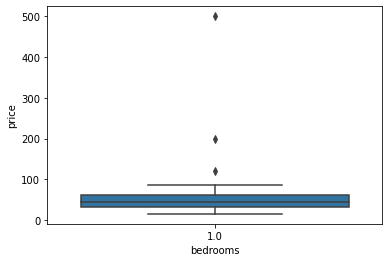

In [21]:
# Pour les chambre partagees
df_Shared_room = df[ df['room_type'] == 'Shared room']
sns.boxplot(x="bedrooms", y="price", data=df_Shared_room)

In [22]:
df_Shared_room.describe()

host_response_rate  host_listings_count   latitude  longitude  \
count           20.000000            20.000000  20.000000  20.000000   
mean             0.977000             2.300000  48.860794   2.363503   
std              0.064978             4.092355   0.016311   0.026885   
min              0.740000             1.000000  48.823300   2.308810   
25%              1.000000             1.000000  48.851577   2.346148   
50%              1.000000             1.000000  48.857610   2.362515   
75%              1.000000             1.250000  48.868558   2.382198   
max              1.000000            19.000000  48.891790   2.408130   

       accommodates  bedrooms  bathrooms       beds       price  cleaning_fee  \
count      20.00000      20.0  20.000000  20.000000   20.000000     20.000000   
mean        2.30000       1.0   1.125000   1.350000   76.750000     17.200000   
std         1.41793       0.0   0.509773   1.424411  107.849249     12.116105   
min         1.00000       1.0   0.000000   0.000000   15.000000      0.000000   
25%         1.00000       1.0   1.000000   1.000000   32.250000      8.000000   
50%         2.00000       1.0   1.000000   1.000000   45.000000     17.500000   
75%         3.25000       1.0   1.000000   1.250000   60.500000     30.000000   
max         6.00000       1.0   2.500000   6.000000  500.000000     35.000000   

       security_deposit  minimum_nights  maximum_nights  number_of_reviews  
count         20.000000       20.000000       20.000000          20.000000  
mean         318.000000        2.000000      535.350000          72.500000  
std          166.088119        1.973509      552.605529          98.906921  
min          100.000000        1.000000        1.000000           0.000000  
25%          150.000000        1.000000       14.000000           0.750000  
50%          300.000000        2.000000      222.500000          34.500000  
75%          500.000000        2.000000     1125.000000         104.000000  
max          500.000000       10.000000     1125.000000         404.000000

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

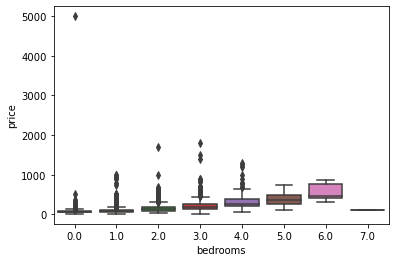

In [23]:
df_Entire_Home = df[ df['room_type'] == 'Entire home/apt']
sns.boxplot(x="bedrooms", y="price", data=df_Entire_Home)

In [24]:
df_Entire_Home.describe()

host_response_rate  host_listings_count     latitude    longitude  \
count         6918.000000          6918.000000  6918.000000  6918.000000   
mean             0.945040             7.761058    48.864727     2.348616   
std              0.157101            54.722785     0.017310     0.030933   
min              0.000000             0.000000    48.816700     2.230810   
25%              1.000000             1.000000    48.852603     2.331778   
50%              1.000000             1.000000    48.865340     2.350940   
75%              1.000000             1.000000    48.878590     2.371570   
max              1.000000           836.000000    48.898690     2.411280   

       accommodates     bedrooms    bathrooms         beds        price  \
count   6918.000000  6918.000000  6918.000000  6918.000000  6918.000000   
mean       3.352269     1.277826     1.129084     1.835357   120.352703   
std        1.571786     0.882747     0.399640     1.205709   115.726416   
min        1.000000     0.000000     0.000000     0.000000     9.000000   
25%        2.000000     1.000000     1.000000     1.000000    69.000000   
50%        3.000000     1.000000     1.000000     2.000000    92.000000   
75%        4.000000     2.000000     1.000000     2.000000   139.000000   
max       16.000000     7.000000     6.000000    11.000000  5000.000000   

       cleaning_fee  security_deposit  minimum_nights  maximum_nights  \
count   6918.000000       6918.000000     6918.000000     6918.000000   
mean      40.275947        477.019514        9.217404      550.307025   
std       28.726178        438.891126       36.407396      545.168718   
min        0.000000          0.000000        1.000000        1.000000   
25%       30.000000        250.000000        2.000000       30.000000   
50%       30.000000        499.500000        3.000000      365.000000   
75%       50.000000        500.000000        5.000000     1125.000000   
max      400.000000       4740.000000     1124.000000    10000.000000   

       number_of_reviews  
count        6918.000000  
mean           41.256288  
std            62.626945  
min             0.000000  
25%             4.000000  
50%            18.000000  
75%            50.000000  
max           588.000000

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

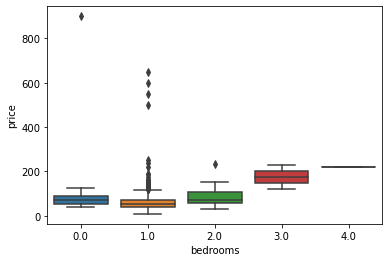

In [25]:
df_Private_room = df[ df['room_type'] == 'Private room']
sns.boxplot(x="bedrooms", y="price", data=df_Private_room)

In [26]:
df_Private_room.describe()

host_response_rate  host_listings_count    latitude   longitude  \
count          836.000000           836.000000  836.000000  836.000000   
mean             0.952404             1.748804   48.863734    2.350546   
std              0.144668             2.120685    0.019519    0.034598   
min              0.000000             0.000000   48.818670    2.251800   
25%              1.000000             1.000000   48.849200    2.331202   
50%              1.000000             1.000000   48.866750    2.352880   
75%              1.000000             2.000000   48.879893    2.376983   
max              1.000000            19.000000   48.901010    2.411870   

       accommodates    bedrooms   bathrooms        beds       price  \
count    836.000000  836.000000  836.000000  836.000000  836.000000   
mean       2.017943    1.020335    1.123206    1.125598   65.013158   
std        0.888200    0.265037    0.691098    0.568444   55.170491   
min        1.000000    0.000000    0.000000    0.000000    8.000000   
25%        2.000000    1.000000    1.000000    1.000000   41.000000   
50%        2.000000    1.000000    1.000000    1.000000   55.000000   
75%        2.000000    1.000000    1.000000    1.000000   72.000000   
max        7.000000    4.000000    7.000000    5.000000  900.000000   

       cleaning_fee  security_deposit  minimum_nights  maximum_nights  \
count    836.000000        836.000000      836.000000      836.000000   
mean      25.624402        361.307416        4.453349      522.372010   
std       15.027801        319.282245       35.042851      531.537971   
min        0.000000          0.000000        1.000000        1.000000   
25%       15.000000        150.000000        1.000000       20.000000   
50%       30.000000        400.000000        2.000000      200.000000   
75%       30.000000        500.000000        3.000000     1125.000000   
max      200.000000       4300.000000     1000.000000     3000.000000   

       number_of_reviews  
count         836.000000  
mean           75.218900  
std           103.247618  
min             0.000000  
25%             5.000000  
50%            31.000000  
75%           105.750000  
max           783.000000

### 3.2 Conclusion
L'analyse statistique des donnees nous montre plusieurs choses: <br/>
1. En premier l'analyse des outliers qui pouraits etre suprime pour ne pas biaiser une eventuelle prediction de valeur dans le futur.
2. On peut dejas estimer en fonction des prix ceux qui serais plus adequat pour nos clients.
3. Enfin les chambres seules n'on pas un prix moyen assez bas
4. On a quand meme une surprise au niveau du prix des maisons, la moyenne est assez basse. Ceci doit etre lier au fait que dans les maison sont classe les logements dans une maison.

## 4 Visualisation des differents logement
Nous allons faire une visualisation sur une carte du monde

In [27]:
import folium

In [28]:
map_paris = folium.Map(location=[48.8534, 2.3488], zoom_start=14)

In [29]:
priv_room = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_Private_room.latitude, df_Private_room.longitude):
    priv_room.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='yellow',
            fill_opacity=0.6
        )
    )
map_paris = map_paris.add_child(priv_room)

In [30]:
priv_ent_homme = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_Entire_Home.latitude, df_Entire_Home.longitude):
    priv_ent_homme.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
map_paris = map_paris.add_child(priv_ent_homme)

In [31]:
shared_room = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_Shared_room.latitude, df_Shared_room.longitude):
    shared_room.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )
map_paris = map_paris.add_child(shared_room)

In [32]:
map_paris

## 5 Selection des valeurs adequate pour notre client
Ici nous allons extraires les valeurs du dataset qui conviennent a notre client.

In [33]:
NB_accomodate = [0,4] #definition du nombre de personne qui est souhaite minimum et maximum
prix = [100,200] #prix du logement minimum et maximum
prix_menage = [0,100] #prix des charges connexes au logement logement minimum et maximum
caution = [0,200] # frais de cotion max et min
bedrooms = [1,2] #nombre de chambre
typee_location = "Entire_home" # le type de location

### 5.1 Selection des chambres qui remplissent les conditions

In [34]:
df_process = None
if typee_location == "Shared_room":
    df_process = df_Shared_room[ ( (df_Shared_room["accommodates"] >= NB_accomodate[0]) | (df_Shared_room["accommodates"] <= NB_accomodate[1])) &
                                 ( (df_Shared_room["price"] >= prix[0]) | (df_Shared_room["price"] <= prix[1])) & 
                                 ( (df_Shared_room["cleaning_fee"] >= prix_menage[0]) | (df_Shared_room["cleaning_fee"] <= prix_menage[1])) &
                                 ( (df_Shared_room["security_deposit"] >= caution[0]) | (df_Shared_room["security_deposit"] <= caution[1]))]
elif typee_location == "Private_room":
    df_process = df_Private_room[ ( (df_Private_room["accommodates"] >= NB_accomodate[0]) | (df_Private_room["accommodates"] <= NB_accomodate[1]) ) & 
                                  ( (df_Private_room["price"] >= prix[0]) | (df_Private_room["price"] <= prix[1])) & 
                                  ( (df_Private_room["cleaning_fee"] >= prix_menage[0]) | (df_Private_room["cleaning_fee"] <= prix_menage[1])) &
                                  ( (df_Private_room["security_deposit"] >= caution[0]) | (df_Private_room["security_deposit"] <= caution[1])) &
                                  ( (df_Private_room["bedrooms"] >= bedrooms[0]) | (df_Private_room["bedrooms"] <= bedrooms[1]))]
elif typee_location == "Entire_home":
    df_process = df_Entire_Home[ ((df_Entire_Home["accommodates"] >= NB_accomodate[0]) & (df_Entire_Home["accommodates"] <= NB_accomodate[1])) &
                                 ((df_Entire_Home["price"] >= prix[0]) & (df_Entire_Home["price"] <= prix[1])) & 
                                 ((df_Entire_Home["cleaning_fee"] >= prix_menage[0]) & (df_Entire_Home["cleaning_fee"] <= prix_menage[1]))&
                                 ((df_Entire_Home["security_deposit"] >= caution[0]) & (df_Entire_Home["security_deposit"] <= caution[1])) & 
                                 ((df_Entire_Home["bedrooms"] >= bedrooms[0]) & (df_Entire_Home["bedrooms"] <= bedrooms[1]))]
    
df_process = df_process.sort_values(by=['price']) #On ordone pas rapport au prix.

In [35]:
df_process = df_process[:50]

## 6 Utilisation de l'API foursquare pour avoir les coordonee des Magasin au alentoures

### 6.1 Define Foursquare Credentials and Version

In [36]:
CLIENT_ID = 'S2HYWN34ICZZHQGL0NMJMOZQLNPQETXDBI5QKGINKHFZHYE1' # your Foursquare ID
CLIENT_SECRET = '2HWTGWMQWC2V1UDCLCG3RVJTB03SAOXFU1AO4MHFMWREW14B' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 500 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: S2HYWN34ICZZHQGL0NMJMOZQLNPQETXDBI5QKGINKHFZHYE1
CLIENT_SECRET:2HWTGWMQWC2V1UDCLCG3RVJTB03SAOXFU1AO4MHFMWREW14B


#### Fonction pour avoir les commerce a cote

In [37]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [38]:
import requests

In [39]:
logement_venues = getNearbyVenues(names=df_process.index,
                                   latitudes=df_process['latitude'],
                                   longitudes=df_process['longitude']
                                  )
logement_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0          7992               48.87822                 2.35769   
1          7992               48.87822                 2.35769   
2          7992               48.87822                 2.35769   
3          7992               48.87822                 2.35769   
4          7992               48.87822                 2.35769   

                                   Venue  Venue Latitude  Venue Longitude  \
0                             Le Delly's       48.878458         2.357852   
1                   Marks & Spencer Food       48.876742         2.358486   
2                           Caves Bardou       48.876635         2.356028   
3                   Marché Saint-Quentin       48.876831         2.355234   
4  Extérieur Quai - Le Bouillon de l'Est       48.876456         2.357905   

       Venue Category  
0  African Restaurant  
1   Food & Drink Shop  
2           Wine Shop  
3      Farmers Market  
4              Bistro

In [40]:
print(logement_venues.shape)

(3783, 7)


### 6.2 Les magasins utiles
Selectionnons les magasins qui seraitent les plus utiles pour nous 

In [41]:
venues_utiles = ['African Restaurant']

In [42]:
logement_venues = logement_venues[logement_venues['Venue Category'].isin(venues_utiles)]

In [43]:
logement_venues_N = logement_venues.groupby(by=["Neighborhood"]).agg(['count'])

In [44]:
logement_venues_N.head()

Neighborhood Latitude Neighborhood Longitude Venue  \
                             count                  count count   
Neighborhood                                                      
790                              1                      1     1   
1046                             1                      1     1   
1758                             1                      1     1   
4451                             1                      1     1   
5421                             1                      1     1   

             Venue Latitude Venue Longitude Venue Category  
                      count           count          count  
Neighborhood                                                
790                       1               1              1  
1046                      1               1              1  
1758                      1               1              1  
4451                      1               1              1  
5421                      1               1              1

Choix des services important, ( restauran, boutiques, supermarche,...)

https://developer.foursquare.com/docs/build-with-foursquare/categories/

In [45]:
nombre_min = 1

In [46]:
result = pd.concat([df_process, logement_venues_N], axis=1, sort=False)
result = result[['host_response_rate','host_listings_count', 'latitude', 'longitude',  'city', 'zipcode', 'state','accommodates','room_type','bedrooms', 'security_deposit', 'minimum_nights','maximum_nights', 'number_of_reviews',('Neighborhood Latitude', 'count')]]
result.rename(columns={('Neighborhood Latitude', 'count'):'count',}, inplace=True)
result.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


host_response_rate  host_listings_count  latitude  longitude   city  \
223                 1.0                  1.0  48.86421    2.34815  Paris   
268                 1.0                  3.0  48.85887    2.39049  Paris   
594                 0.8                  2.0  48.85370    2.36794  Paris   
596                 1.0                  1.0  48.84978    2.38015  Paris   
637                 1.0                 19.0  48.85669    2.36157  Paris   

    zipcode          state  accommodates        room_type  bedrooms  \
223   75002  Île-de-France             4  Entire home/apt       1.0   
268   75020  Île-de-France             2  Entire home/apt       1.0   
594   75004  Île-de-France             2  Entire home/apt       1.0   
596   75012  Île-de-France             4  Entire home/apt       2.0   
637   75004  Île-de-France             4  Entire home/apt       1.0   

     security_deposit  minimum_nights  maximum_nights  number_of_reviews  \
223             200.0               1              30                 49   
268             100.0               4              70                 25   
594             150.0               2             362                239   
596               0.0               4              30                  8   
637             200.0               4             365                 68   

     count  
223    NaN  
268    NaN  
594    NaN  
596    NaN  
637    NaN

In [47]:
result_filtered = result[ result['count'] >= nombre_min]
result_filtered.columns

Index(['host_response_rate', 'host_listings_count', 'latitude', 'longitude',
       'city', 'zipcode', 'state', 'accommodates', 'room_type', 'bedrooms',
       'security_deposit', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'count'],
      dtype='object')

Affichage des valeurs finales

In [48]:
result_filtered.head()

host_response_rate  host_listings_count  latitude  longitude   city  \
790                  1.0                  1.0  48.86939    2.37471  Paris   
1046                 1.0                  1.0  48.87254    2.38944  Paris   
1758                 1.0                  1.0  48.83401    2.37115  Paris   
4451                 1.0                  1.0  48.86705    2.34558  Paris   
5421                 1.0                  1.0  48.88185    2.36795  Paris   

     zipcode          state  accommodates        room_type  bedrooms  \
790    75011  Île-de-France             4  Entire home/apt       2.0   
1046   75020  Île-de-France             4  Entire home/apt       2.0   
1758   75013  Île-de-France             3  Entire home/apt       1.0   
4451   75002  Île-de-France             4  Entire home/apt       2.0   
5421   75010  Île-de-France             4  Entire home/apt       1.0   

      security_deposit  minimum_nights  maximum_nights  number_of_reviews  \
790              200.0               3              14                 41   
1046               0.0               3             365                 15   
1758               0.0               2            1125                 18   
4451             150.0               3            1125                  8   
5421             100.0               1               7                  4   

      count  
790     1.0  
1046    1.0  
1758    1.0  
4451    1.0  
5421    1.0

In [49]:
map_paris = folium.Map(location=[48.8534, 2.3488], zoom_start=14)

In [50]:
priv_room = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(result_filtered.latitude, result_filtered.longitude):
    priv_room.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
map_paris = map_paris.add_child(priv_room)

In [51]:
map_paris

### Kmean clustering

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = result_filtered.drop(columns=['city','zipcode','state', 'room_type']).to_numpy()
# host_response_rate on suprime la colone host_response_rate car nous l'avons modifier
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

kmeans = KMeans(n_clusters=3, random_state=0).fit(data).fit_predict(data)

In [53]:
map_paris = folium.Map(location=[48.8534, 2.3488], zoom_start=14)
lis_col = ['red','blue','yellow']

priv_room = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, col in zip(result_filtered.latitude, result_filtered.longitude, kmeans):
    priv_room.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color=lis_col[col],
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
map_paris = map_paris.add_child(priv_room)
map_paris

## 7 Wikipedia scraping

In [54]:
!pip install beautifulsoup4 requests
!pip install reverse_geocoder

     |████████████████████████████████| 122kB 4.9MB/s eta 0:00:01
     |████████████████████████████████| 2.3MB 6.4MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/47/05/50/b1350ff094ef91e082665b4a2f9ca551f8acea4aa55d796b26
Successfully built reverse-geocoder


In [55]:
import requests
from bs4 import BeautifulSoup

In [56]:
headers = {
    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'
    }

In [57]:
url = "https://fr.wikipedia.org/wiki/Liste_des_quartiers_administratifs_de_Paris"
req = requests.get(url, headers)
soup = BeautifulSoup(req.content, 'html.parser')

In [58]:
mx = 4
i = 0
lit = []
tmp = []
for td in soup.find_all("td"):
    tr = td.getText()
    if "arrondissementdit" in tr:
        continue
    else:
        if i == mx:
            lit.append(tmp)
            tmp = []
            i = 0
        else:
            if tr != '\n':
                tmp.append(tr.strip())
                i += 1

In [59]:
import pandas as pd
lit = lit[0:80]
df_wiki = pd.DataFrame(lit,columns=['arrondissement', 'Quartiers', 'Population', 'superficie'])
df_wiki.head()

arrondissement                  Quartiers Population superficie
0            1er  Saint-Germain-l'Auxerrois      1 672       86,9
1             2e                     Halles      8 984       41,2
2             3e               Palais-Royal      3 195       27,4
3             4e              Place-Vendôme      3 044       26,9
4             5e                    Gaillon      1 345       18,8

Convert lat long

In [60]:
import reverse_geocoder as rg

def nomquartier(lat_list, lng_list):
    lst = []
    for latlng in zip(lat_list,lng_list):
        lst.append(rg.search(latlng)[0]['name'])
    return lst


In [ ]:
result_filtered['quartier'] = nomquartier(result_filtered.latitude, result_filtered.longitude)

Loading formatted geocoded file...


In [ ]:
df_wiki.to_csv('out.csv', index=False)  

In [ ]:
result_filtered.head(15)

In [ ]:
result_filtered.to_csv('final.csv', index=False)  